# Import des données et des librairies

In [1]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/leodray/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/leodray/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/leodray/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/leodray/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/leodray/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import os
import pandas as pd
import numpy as np
import pickle
from nltk import WordNetLemmatizer, PerceptronTagger, PorterStemmer
from nltk.corpus import stopwords
from nltk.corpus.reader import wordnet
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import regex as re
from bs4 import BeautifulSoup

In [3]:
data = pd.read_csv('data/QueryV2.csv')

# Preprocessing

In [4]:
stpwrds = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "A", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "after", "afterwards", "ag", "again", "against", "ah", "ain", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appreciate", "approximately", "ar", "are", "aren", "arent", "arise", "around", "as", "aside", "ask", "asking", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "B", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "been", "before", "beforehand", "beginnings", "behind", "below", "beside", "besides", "best", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "C", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "ci", "cit", "cj", "cl", "clearly", "cm", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "could", "couldn", "couldnt", "course", "cp", "cq", "cr", "cry", "cs", "ct", "cu", "cv", "cx", "cy", "cz", "d", "D", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "dj", "dk", "dl", "do", "does", "doesn", "doing", "don", "done", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "E", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "F", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "G", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "H", "h2", "h3", "had", "hadn", "happens", "hardly", "has", "hasn", "hasnt", "have", "haven", "having", "he", "hed", "hello", "help", "hence", "here", "hereafter", "hereby", "herein", "heres", "hereupon", "hes", "hh", "hi", "hid", "hither", "hj", "ho", "hopefully", "how", "howbeit", "however", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "im", "immediately", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "inward", "io", "ip", "iq", "ir", "is", "isn", "it", "itd", "its", "iv", "ix", "iy", "iz", "j", "J", "jj", "jr", "js", "jt", "ju", "just", "k", "K", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "ko", "l", "L", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "M", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "my", "n", "N", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "neither", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "O", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "otherwise", "ou", "ought", "our", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "P", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "pp", "pq", "pr", "predominantly", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "Q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "R", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "S", "s2", "sa", "said", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "seem", "seemed", "seeming", "seems", "seen", "sent", "seven", "several", "sf", "shall", "shan", "shed", "shes", "show", "showed", "shown", "showns", "shows", "si", "side", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somehow", "somethan", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "sz", "t", "T", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "thats", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "thereof", "therere", "theres", "thereto", "thereupon", "these", "they", "theyd", "theyre", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "U", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "used", "useful", "usefully", "usefulness", "using", "usually", "ut", "v", "V", "va", "various", "vd", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "W", "wa", "was", "wasn", "wasnt", "way", "we", "wed", "welcome", "well", "well-b", "went", "were", "weren", "werent", "what", "whatever", "whats", "when", "whence", "whenever", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "whom", "whomever", "whos", "whose", "why", "wi", "widely", "with", "within", "without", "wo", "won", "wonder", "wont", "would", "wouldn", "wouldnt", "www", "x", "X", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "Y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "your", "youre", "yours", "yr", "ys", "yt", "z", "Z", "zero", "zi", "zz"]


def separate_code(text):
    pointer=text.find('<code>')
    result=''
    while pointer!=-1:
        ender=text.find(u'</code>',pointer)
        result=result+text[pointer+6:ender]
        pointer=text.find('<code>',ender)
    return result

  
def remove_code(text):
    pointer=text.find('<code>')
    while pointer!=-1:
        ender=text.find(u'</code>')
        text=text.replace(text[pointer:ender+7],' ')
        pointer=text.find('<code>')
    return text
def remove_html(text):
    return BeautifulSoup(text, 'lxml').get_text()


def letters_only(text):
    text=text.lower()
    text=re.sub("c\+\+","cplusplus", text)
    text=re.sub("c#","csharp", text)
    text=re.sub("\.net","dotnet", text)
    text=re.sub("d3\.js","d3js", text)
    text=re.sub("[^a-zA-Z]"," ", text)
    return text

  
def tokenize_body(text):
    text=word_tokenize(text)
    return text
  
  
lm = WordNetLemmatizer()

def wordnet_tag(tag):
        # Convert POS default tags to wordnet lemmatizer tags
        if tag.startswith('J'):
            return wordnet.ADJ
        elif tag.startswith('V'):
            return wordnet.VERB
        elif tag.startswith('N'):
            return wordnet.NOUN
        elif tag.startswith('R'):
            return wordnet.ADV
        else:
            # Default pos in lemmatization is Noun
            return wordnet.NOUN

tagger=PerceptronTagger()          
def postag_body(text):
    text=tagger.tag(text)
    return text
  
  
def lemm(text):
    for i,word in enumerate(text):
        text[i]=lm.lemmatize(word[0],pos=wordnet_tag(word[1]))
    return text
  
  
ps = PorterStemmer()

def stem(text):
    for word in text:
        word=ps.stem(word)
    return text
  
  
default_stopwords = set(stopwords.words('english'))
# The custom Stopwords list is a custom list built and curated manually after running a count vectorizer on the body a first time
#custom_stopwords = pickle.load( open( "../input/custom_stopwords.p", "rb" ) )
#stpwrds= default_stopwords.union(custom_stopwords)


def remove_stopwords(text):
    return [ w for w in text if not w in stpwrds]
  
  
def code_strip(text):
    text=text.strip(u'\n')
    text=text.lower()
    text=re.sub("[^a-zA-Z]"," ", text)
    return text
  
  
def tag_clean(text):
    text=re.sub("<","", text)
    text=re.sub(">"," ", text)
    return text
  
def body_join(text):
    text=' '.join(text)
    return text

In [5]:
data['Code']=data['Body'].apply(separate_code).apply(code_strip)

In [6]:
data['Body']=data['Body'].apply(remove_code).apply(remove_html).apply(letters_only)

In [7]:
data['Body']=data['Body'].apply(tokenize_body)

In [8]:
data['Body']=data['Body'].apply(postag_body) #Nécessaire à la lemmatisation

In [9]:
data['Body']=data['Body'].apply(lemm)

In [10]:
data['Body']=data['Body'].apply(remove_stopwords).apply(body_join)

In [11]:
data['Title']=data['Title'].apply(letters_only)

In [12]:
data['Title']=data['Title'].apply(tokenize_body)

In [13]:
data['Title']=data['Title'].apply(postag_body)

In [14]:
data['Title']=data['Title'].apply(lemm)

In [15]:
data['Title']=data['Title'].apply(remove_stopwords).apply(body_join)

In [16]:
data['Tags']=data['Tags'].apply(tag_clean)

# Analyse univariée

In [17]:
text = ''

for e in data['Tags']:
    text += e

In [18]:
list_tags = text.split(' ')

### Top 20 tags

In [19]:
pd.Series(list_tags).value_counts()[0:20]

java           5799
python         5261
c#             5229
javascript     4833
ios            4245
android        3510
c++            3493
.net           2792
iphone         2346
objective-c    2346
html           2148
php            1891
jquery         1846
c              1658
linux          1428
css            1308
sql            1180
performance    1171
asp.net        1140
node.js        1134
dtype: int64

### Pie plot of top 20 tags

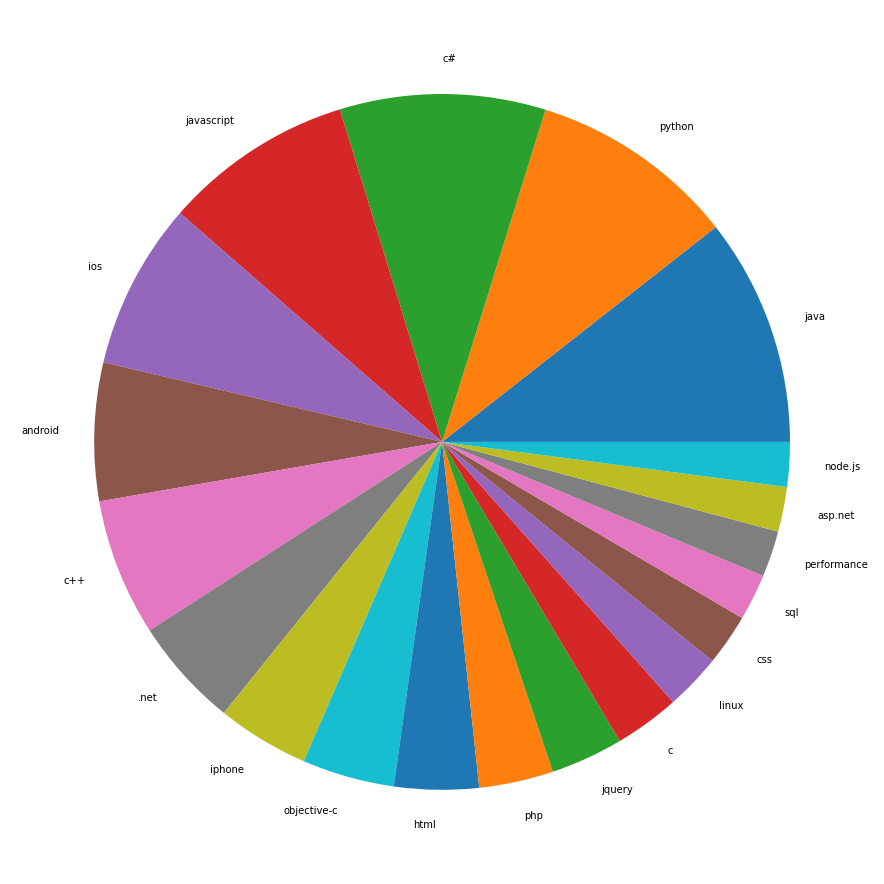

In [20]:
fig = plt.figure(figsize=(20,16))

plt.pie(pd.Series(list_tags).value_counts()[0:20], labels = pd.Series(list_tags).value_counts()[0:20].index)

plt.show()

### Wordcloud of top 20 tags

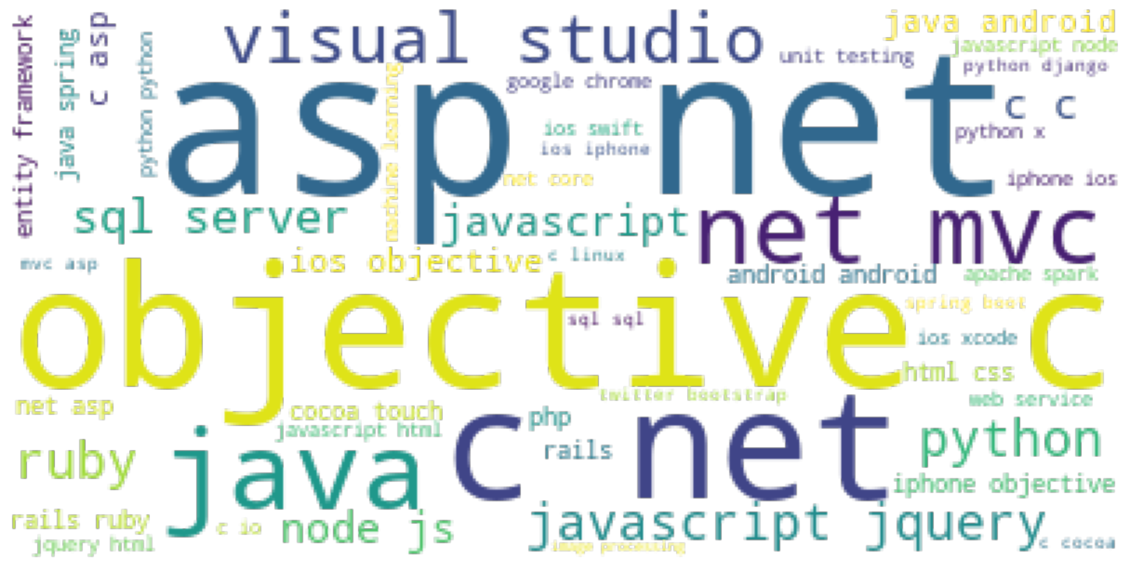

In [21]:
#Wordclouds des tags les plus représentés

wordcloud = WordCloud(mode="RGBA", background_color=None, max_words=50).generate(text)
fig = plt.figure(figsize=(20, 16))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()



### Tags les plus représentés pour les 100 posts les plus vus

In [32]:
data.sort_values(by = 'ViewCount', ascending=False)[0:100]

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount,Code,TagsNumber
23307,delete git branch locally remotely,want delete branch locally remotely fail attem...,git version-control git-branch git-push git-re...,2003505,19032,9771619,5830,41,git branch d remotes origin bugfix error b...,0
48543,file contain specific text linux,scan entire linux system file contain specific...,linux text grep directory find,16956810,6577,8778721,3149,54,find type f exec grep h text to find her...,0
18397,force git pull overwrite local file,force overwrite local file scenario follow tea...,git version-control overwrite git-pull git-fetch,1125968,8546,6519565,3002,48,git pull,0
37968,check string contain specific word,suppose code correct write statement,php string substring contains string-matching,4366730,2660,6049110,689,36,a how are you if a contains are ...,0
23836,javascript code receive access control origin ...,mod note question browser subject same access ...,javascript jquery cors same-origin-policy flas...,20035101,2991,5368276,776,10,xmlhttprequestfetch ajax type post ...,0
...,...,...,...,...,...,...,...,...,...,...
5490,close hide android soft keyboard programmatically,layout write edit field click want hide virtua...,android android-edittext android-softkeyboard ...,1109022,4173,1715140,1112,124,edittextbuttonbutton,0
469,vertically center div element browser use,want center vertically want table javascript p...,css cross-browser alignment vertical-alignment...,396145,1556,1698600,555,47,div lt body gt lt div gt div to be align...,0
27183,set value input field,set default value form text field javascript,javascript html forms input html-input,7609130,560,1698550,82,18,lt input gt,0
43464,process sorted array faster process unsorted a...,piece cplusplus code peculiar behavior strange...,java c++ performance cpu-architecture branch-p...,11227809,26285,1694831,11552,27,include lt algorithm gt include lt ctime ...,0


In [35]:
text_top_100 = ''

for e in data.sort_values(by = 'ViewCount', ascending=False)[0:100]['Tags']:
    text_top_100 += e

In [36]:
list_tags_top_100 = text_top_100.split(' ')

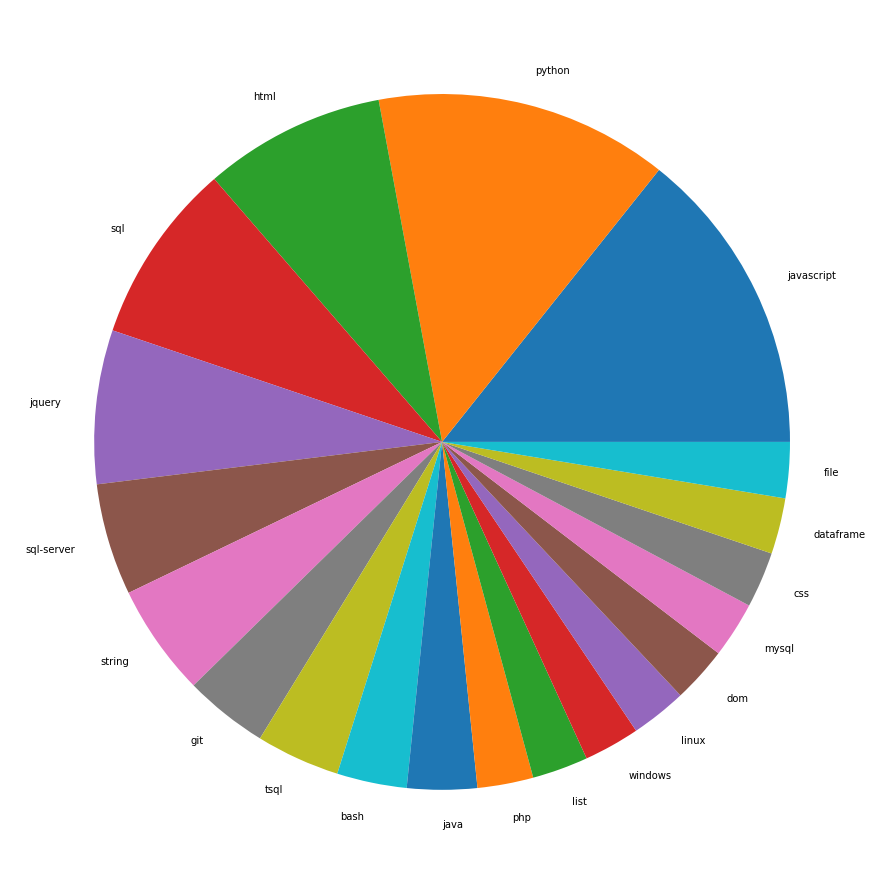

In [37]:
fig = plt.figure(figsize=(20,16))

plt.pie(pd.Series(list_tags_top_100).value_counts()[0:20], labels = pd.Series(list_tags_top_100).value_counts()[0:20].index)

plt.show()

# Analyse bivariée

In [ ]:
# box plot avec le nombre de mots dans le titre en fonction des vues ?

In [ ]:
# Voir answer count en fonction des vues ?

In [ ]:
# Premier tag 

# Réduction de dimensionnalité

In [ ]:
# Vectorisation Title + Body (TFIDF ?)

In [ ]:
# T SNE / UMAP / ACP ==> Scatter plot en 2D ou 3D avec plotly ?

In [ ]:
# yellowbrick --> https://www.scikit-yb.org/en/latest/api/text/tsne.html 

# labeliser avec premier tag de la liste ?

# Export des données preprocessed

In [29]:
if not os.path.exists('clean_data.csv'):
    with open('clean_data.csv', 'w'): pass
    
data.to_csv('clean_data.csv')